In [2]:
import numpy as np
import pandas as pd
import csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

![JPYNB image](./images/FindingFormFactor.png)

In [3]:
filename = 'subsurfaces1.csv'
with open(filename, 'rU') as p:
        my_list = [[int(x) for x in rec] for rec in csv.reader(p, delimiter=',')]
subsurfaces1 = [my_list[x:x+4] for x in range(0, len(my_list), 4)]  # note: 4 coordinates to a surfaces

filename = 'subsurfaces2.csv'
with open(filename, 'rU') as p:
        my_list = [[int(x) for x in rec] for rec in csv.reader(p, delimiter=',')]
subsurfaces2 = [my_list[x:x+4] for x in range(0, len(my_list), 4)]  # note: 4 coordinates to a surfaces

C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  
C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 'U' mode is deprecated
  import sys


In [4]:
x = []; x1 = [] 
y =[]; y1 = [] 
z = []; z1 = []

for s1 in subsurfaces1:
    for ss1 in s1:
        x.append(ss1[0])
        y.append(ss1[1])
        z.append(ss1[2])

for s2 in subsurfaces2:
    for ss2 in s2:
        x1.append(ss2[0])
        y1.append(ss2[1])
        z1.append(ss2[2])

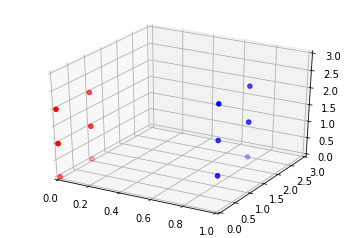

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, zdir='y', c='r')
ax.scatter(x1, y1, z1, zdir='y', c='b')

ax.legend()
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 3)
ax.set_zlim3d(0, 3)

plt.show()

In [6]:
# Geometric Functions

def midpt_polygon(s): # returns centre of polygon
    n_vertices = len(s)
    return [x/n_vertices for x in (sum(i) for i in zip(*s))]
def vector_vertices(a,b): # returns vector of edge connecting 2 vertices
    return [b[0] - a[0], b[1] - a[1], b[2] - a[2]]
def mag_vector(x): # returns magnitude of vector
    return np.sqrt(np.sum(np.square(x)))
def area_polygon(s): # returns area of polygon
    return mag_vector(vector_vertices(s[0],s[1]))* mag_vector(vector_vertices(s[1],s[2]))
def normal_vector(s): # returns vector normal to surface defined by 3 points
    ab = vector_vertices(s[0],s[1])
    bc = vector_vertices(s[1],s[2])
    return [ab[1]*bc[2]-ab[2]*bc[1],ab[0]*bc[2]-ab[2]*bc[0],ab[0]*bc[1]-ab[1]*bc[0]]
def angle_incident(vector1,vector2): #returns angle between 2 vectors
    return np.arccos(sum([a*b for a,b in zip(vector1,vector2)])/(mag_vector(vector1)* mag_vector(vector2)))
def form_factor(A1,A2,theta1,theta2,r): # returns form factor of surface 2 wrt surface 1
    return np.cos(theta1)*np.cos(theta2)*A1*A2/(3.14*np.square(r))

In [7]:
#  define empty lists to populate with calculation parameters/outputs
f = []
theta1_arch = []
theta2_arch = []
R_arch = []
Rmag_arch =[]

In [8]:
#  form factor calculation

for s1 in subsurfaces1:
    for s2 in subsurfaces2:
        R = vector_vertices(midpt_polygon(s1), midpt_polygon(s2))
        Rmag = mag_vector(R)
        theta1 = angle_incident(R, normal_vector(s1))
        theta2 = angle_incident(R, normal_vector(s2))
        f.append(form_factor(area_polygon(s1),area_polygon(s2),theta1,theta2,Rmag))
        R_arch.append(R)
        Rmag_arch.append(Rmag)
        theta1_arch.append(theta1)
        theta2_arch.append(theta2)

In [10]:
# Calculate area of primary polygon
A1 = 0
for item in subsurfaces1: A1 = A1+ area_polygon(item)

# Calculate form factor
result = (sum(f))/A1
print("The distance vectors are ", R_arch)
print("The distances are ", Rmag_arch)
print("The theta1s are ", theta1_arch)
print("The theta2s are ", theta2_arch)
print("The final form factor is ", result)

The distance vectors are  [[1.0, 1.0, 0.0], [1.0, 1.75, 0.0], [1.0, 0.0, 0.0], [1.0, 0.75, 0.0]]
The distances are  [1.4142135623730951, 2.0155644370746373, 1.0, 1.25]
The theta1s are  [0.78539816339744839, 1.0516502125483735, 0.0, 0.64350110879328426]
The theta2s are  [0.78539816339744839, 1.0516502125483735, 0.0, 0.64350110879328426]
The final form factor is  0.348787170693
